### Check if configuration has been run already and change directory to repository root:

In [1]:
from scripts.conf_file_finding import try_find_conf_file
try_find_conf_file()

Local configuration file found !!, no need to run the configuration (unless configuration has changed)


In [2]:
import datajoint as dj
import os
import getpass
import pandas as pd
import subprocess
import json
import u19_pipeline.utils.path_utils as pu
import pathlib
import u19_pipeline.automatic_job as auto_pipeline
import u19_pipeline.automatic_job.recording_handler as rec_handler

from u19_pipeline import recording, imaging_rec, ephys

#import utility.dj_shortcuts as dj_short
#import utility.acquisition_pipeline_handler as aph
dj.__version__

Connecting alvaros@datajoint00.pni.princeton.edu:3306


'0.13.2'

In [3]:
recording.StatusRecordingDefinition()

status_recording_idx status in the automate process pipeline,status_definition Status definition
-1,Error in recording handling
0,New recording
1,Recording directory transfer to PNI requested
2,Recording directory transferred to PNI
3,modality ingestion & Syncing jobs done


In [4]:

fake_recording = dict()
fake_recording['recording_modality'] = 'electrophysiology'
fake_recording['location'] = 'Bezos1'
fake_recording['status_recording_idx'] = 0
fake_recording['process_paramset_idx'] = 1
fake_recording['preprocess_paramset_idx'] = 1
fake_recording['recording_directory'] = 'ms81/ms81_M004/20210507/towersTask_g0'
fake_recording['local_directory'] = 'ms81/ms81_M004/20210507/towersTask_g0'

#recording.Recording.insert1(fake_recording, skip_duplicates=True)

In [5]:
fake_recording = dict()
fake_recording['recording_modality'] = 'imaging'
fake_recording['location'] = 'Bezos1'
fake_recording['status_recording_idx'] = 0
fake_recording['process_paramset_idx'] = 1
fake_recording['preprocess_paramset_idx'] = 2
fake_recording['recording_directory'] = 'emdia/emdia_gps24/20220111'
fake_recording['local_directory'] = 'emdia/emdia_gps24/20220111'

#recording.Recording.insert1(fake_recording, skip_duplicates=True)


In [6]:
l = rec_handler.RecordingHandler.pipeline_handler_main()

function to apply: modality_preingestion
imaging scan insert recording_id                                         4
recording_modality                             imaging
location                                        Bezos1
status_recording_idx                                 2
preprocess_paramset_idx                              2
process_paramset_idx                                 1
task_copy_id_pni                                  None
inherit_params_recording                             1
recording_directory         emdia/emdia_gps24/20220111
local_directory             emdia/emdia_gps24/20220111
query_key                          {'recording_id': 4}
Name: 0, dtype: object
recording_units [{'recording_id': 4, 'fov': 1, 'fov_directory': 'emdia/emdia_gps24/20220111/ROI01_z1/', 'relative_fov_directory': 'emdia/emdia_gps24/20220111/ROI01_z1/', 'fov_name': 'mM2_z1', 'fov_depth': 1120.0, 'fov_center_xy': array([[-1662.46125877,   269.83897896]]), 'fov_size_xy': array([[537.60000003, 5

In [7]:
recording.RecordingProcess()



recording_process_id Unique number assigned to each processing job for a recording unit,recording_id Unique number assigned to each recording,status_pipeline_idx status in the automate process pipeline,preprocess_paramset_idx,process_paramset_idx,"recording_process_pre_path relative path for raw data recording subdirectory that will be processed (ephys-> probe, imaging->fieldofview)",recording_process_post_path relative path for processed data recording,task_copy_id_pre id for globus transfer task raw file cup->tiger,task_copy_id_post id for globus transfer task sorted file tiger->cup,slurm_id id for slurm process in tiger
16,2,0,1,1,/Volumes/braininit/Data/electrophysiology/ms81/ms81_M004/20210507/towersTask_g0/towersTask_g0_imec0/,None,None,None,None
17,2,0,1,1,/Volumes/braininit/Data/electrophysiology/ms81/ms81_M004/20210507/towersTask_g0/towersTask_g0_imec1/,None,None,None,None
18,3,0,1,1,/Volumes/braininit/Data/electrophysiology/ms81/ms81_M004/20210507/towersTask_g0/towersTask_g0_imec0/,None,None,None,None
19,3,0,1,1,/Volumes/braininit/Data/electrophysiology/ms81/ms81_M004/20210507/towersTask_g0/towersTask_g0_imec1/,None,None,None,None
21,4,0,2,1,emdia/emdia_gps24/20220111/ROI01_z1/,None,None,None,None
22,4,0,2,1,emdia/emdia_gps24/20220111/ROI02_z1/,None,None,None,None
23,4,0,2,1,emdia/emdia_gps24/20220111/ROI03_z1/,None,None,None,None


In [8]:
recording.Recording()

recording_id Unique number assigned to each recording,"recording_modality modalities for recording (ephys, imaging, video_recording, etc.)",location,status_recording_idx status in the automate process pipeline,preprocess_paramset_idx,process_paramset_idx,task_copy_id_pni id for globus transfer task raw file local->cup,inherit_params_recording all RecordingProcess from a recording will have same paramSets,recording_directory relative directory where the recording will be stored on cup,local_directory local directory where the recording is stored on system
2,electrophysiology,Bezos1,3,1,1,None,1,ms81/ms81_M004/20210507/towersTask_g0,ms81/ms81_M004/20210507/towersTask_g0
3,electrophysiology,Bezos1,3,1,1,None,1,ms81/ms81_M004/20210507/towersTask_g0,ms81/ms81_M004/20210507/towersTask_g0
4,imaging,Bezos1,3,2,1,None,1,emdia/emdia_gps24/20220111,emdia/emdia_gps24/20220111


In [9]:
ephys.EphysRecordingProbes()

recording_id Unique number assigned to each recording,probe probe number for the recording,probe_directory probe specific directory
2,0,/Volumes/braininit/Data/electrophysiology/ms81/ms81_M004/20210507/towersTask_g0/towersTask_g0_imec0/
2,1,/Volumes/braininit/Data/electrophysiology/ms81/ms81_M004/20210507/towersTask_g0/towersTask_g0_imec1/
3,0,/Volumes/braininit/Data/electrophysiology/ms81/ms81_M004/20210507/towersTask_g0/towersTask_g0_imec0/
3,1,/Volumes/braininit/Data/electrophysiology/ms81/ms81_M004/20210507/towersTask_g0/towersTask_g0_imec1/


### Declare AutoPipeline and Status tables if they don't exist

In [10]:
ephys.EphysProcessing()

recording_process_id Unique number assigned to each processing job for a recording unit,recording_id Unique number assigned to each recording,probe probe number for the recording
16,2,0
17,2,1
18,3,0
19,3,1


In [11]:
imaging_rec.Scan()


recording_id Unique number assigned to each recording
4


In [13]:
imaging_rec.ScanInfo()

recording_id Unique number assigned to each recording,file_name_base base name of the file,scan_width width of scanning in pixels,scan_height height of scanning in pixels,acq_time acquisition time,n_depths number of depths,scan_depths depth values in this scan,frame_rate imaging frame rate,inter_fov_lag_sec time lag in secs between fovs,frame_ts_sec frame timestamps in secs 1xnFrames,channels is this the channer number or total number of channels,cfg_filename cfg file path,usr_filename usr file path,fast_z_lag fast z lag,fast_z_flyback_time time it takes to fly back to fov,line_period scan time per line,scan_frame_period,scan_volume_rate,flyback_time_per_frame,flyto_time_per_scan_field,"fov_corner_points coordinates of the corners of the full 5mm FOV, in microns",nfovs number of field of view,nframes number of frames in the scan,nframes_good number of frames in the scan before acceptable sample bleaching threshold is crossed,last_good_file number of the file containing the last good frame because of bleaching,motion_correction_enabled,motion_correction_mode,stacks_enabled,stack_actuator,stack_definition
4,emdia/emdia_gps24/20220111/gps24_20220111_mainrecording_00001_00001.tif,512,1588,2022-01-11 00:00:00,1,=BLOB=,14.3005,0.001,=BLOB=,=BLOB=,C:\Users\admin\Documents\MATLAB\MikaToo.cfg,C:\Users\admin\Documents\MATLAB\Mika.usr,0.0008,0.004,4.14754e-05,0.0699276,14.3005,0.001,0.001,=BLOB=,3,51468,36000,18,1,automated,1,fastZ,arbitrary


In [14]:
imaging_rec.ImagingProcessing()

recording_process_id Unique number assigned to each processing job for a recording unit,recording_id Unique number assigned to each recording,fov number of the field of view in this scan
21,4,1
22,4,2
23,4,3


In [11]:
a = pd.DataFrame(auto_pipeline.status_pipeline_dict)
r = a['Value'].max()
r

11

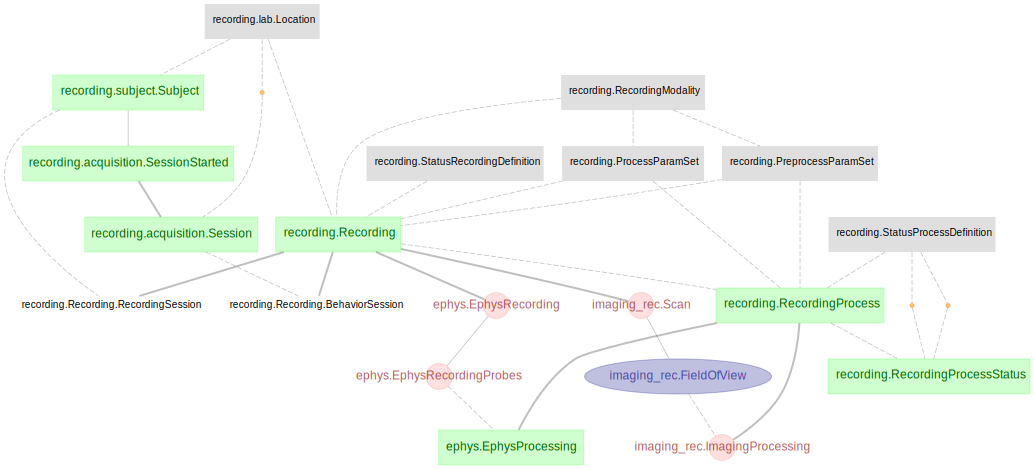

In [10]:
dj.ERD(recording) -1 + dj.ERD(ephys.EphysRecording) + dj.ERD(ephys.EphysProcessing) + dj.ERD(imaging_rec.Scan) + dj.ERD(imaging_rec.ImagingProcessing) 


In [ ]:
## Just for now, folders for ephys things in Globus
#FOR PNI endpoint
pni_ep_id = '6ce834d6-ff8a-11e6-bad1-22000b9a448b'
pni_ephys_root_data_dir   = '/jukebox/archive/brody/RATTER/PhysData/Raw/'
pni_ephys_sorted_data_dir = '/mnt/cup/labs/brody/RATTER/PhysData/Test_ephys_pipeline_NP_sorted/'

#For tiger endpoint
tiger_ep_dir = 'a9df83d2-42f0-11e6-80cf-22000b1701d1'
tiger_ephys_root_data_dir = '/tigress/alvaros/ephys_raw/'
tiger_ephys_sorted_data_dir = '/tigress/alvaros/ephys_sorted/'


### Delete and insert on the AcquisitionSessionsTestAutoPipeline and Status tables

In [ ]:
#acquisition.AcquisitionSessionsTestAutoPipeline.delete()
#acquisition.AcquisitionSessionsStatus.delete

### Get 5 "real" sessions to test and insert them to the TestAutoPipeline

In [ ]:
acq_sessions_df = pd.DataFrame(acquisition.AcquisitionSessions.fetch(limit=5, as_dict=True))
acq_sessions_df['status_pipeline'] = 0
acquisition.AcquisitionSessionsTestAutoPipeline.insert(acq_sessions_df, skip_duplicates=True)
acquisition.AcquisitionSessionsTestAutoPipeline()

### Check if logged to globus

In [4]:
s = subprocess.run(["globus", "whoami"], capture_output=True)
s.stdout.decode('UTF-8')

'alvaros@princeton.edu\n'

### Get all "active sessions"

In [5]:
sessions_active = acquisition.AcquisitionSessionsTestAutoPipeline & 'status_pipeline < 7 and status_pipeline >= 0'
df_sessions = pd.DataFrame(sessions_active.fetch(as_dict=True))

#Add a column to have a key dictionary as a new column
key_list = dj_short.get_primary_key_fields(acquisition.AcquisitionSessionsTestAutoPipeline)
df_sessions['query_key'] = df_sessions.loc[:, key_list].to_dict(orient='records')
df_sessions

,sessid,status_pipeline,session_rat,session_userid,session_rigid,acquisition_type,acquisition_raw_rel_path,acquisition_post_rel_path,task_copy_id_pre_path,task_copy_id_pos_path,slurm_id_sorting,query_key
0,590577,0,T173,zhihaol,202,ephys,Ann/misc,TestFolder2,None,None,None,{'sessid': 590577}


In [6]:
import time
for i in range(30):
    
    aph.pipeline_handler_main()
    time.sleep(3)
    

0    0
Name: status_pipeline, dtype: int64
['globus', 'transfer', '6ce834d6-ff8a-11e6-bad1-22000b9a448b:/jukebox/archive/brody/RATTER/PhysData/Raw/Ann/misc', 'a9df83d2-42f0-11e6-80cf-22000b1701d1:/tigress/alvaros/ephys_raw/Ann/misc', '--recursive', '--format', 'json']
0    1
Name: status_pipeline, dtype: int64
['globus', 'task', 'show', 'd6aaa788-36b6-11ec-9e53-3df4ed83d858', '--format', 'json']
0    1
Name: status_pipeline, dtype: int64
0    1
Name: status_pipeline, dtype: int64
0    1
Name: status_pipeline, dtype: int64
0    1
Name: status_pipeline, dtype: int64
0    1
Name: status_pipeline, dtype: int64
0    1
Name: status_pipeline, dtype: int64
0    1
Name: status_pipeline, dtype: int64
['globus', 'task', 'show', 'd6aaa788-36b6-11ec-9e53-3df4ed83d858', '--format', 'json']
0    2
Name: status_pipeline, dtype: int64
['ssh', 'alvaros@tigergpu.princeton.edu', 'sbatch', '/tigress/alvaros/slurm_files/slurm_sessid_590577.slurm']
aftercommand before comm
aftercommand after comm
Submitted b

0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name: status_pipeline, dtype: int64
0    6
Name